In [1]:
import pandas as pd

In [2]:
reviews_1 = pd.read_csv("../data/reviews_1.csv", usecols=['business_id', 'stars'])
reviews_2 = pd.read_csv("../data/reviews_2.csv", usecols=['business_id', 'stars'])
reviews_3 = pd.read_csv("../data/reviews_3.csv", usecols=['business_id', 'stars'])
reviews_4 = pd.read_csv("../data/reviews_4.csv", usecols=['business_id', 'stars'])
reviews_5 = pd.read_csv("../data/reviews_5.csv", usecols=['business_id', 'stars'])
reviews_6 = pd.read_csv("../data/reviews_6.csv", usecols=['business_id', 'stars'])
reviews_7 = pd.read_csv("../data/reviews_7.csv", usecols=['business_id', 'stars'])
reviews_8 = pd.read_csv("../data/reviews_8.csv", usecols=['business_id', 'stars'])
reviews_9 = pd.read_csv("../data/reviews_9.csv", usecols=['business_id', 'stars'])
reviews_10 = pd.read_csv("../data/reviews_10.csv", usecols=['business_id', 'stars'])
reviews_11 = pd.read_csv("../data/reviews_11.csv", usecols=['business_id', 'stars'])
reviews_12 = pd.read_csv("../data/reviews_12.csv", usecols=['business_id', 'stars'])
reviews_13 = pd.read_csv("../data/reviews_13.csv", usecols=['business_id', 'stars'])
reviews_14 = pd.read_csv("../data/reviews_14.csv", usecols=['business_id', 'stars'])

In [3]:
datasets = [reviews_1, reviews_2, reviews_3, reviews_4, reviews_5, reviews_6, reviews_7,
           reviews_8, reviews_9, reviews_10, reviews_11, reviews_12, reviews_13, reviews_14]
reviews = pd.concat(datasets)

In [4]:
reviews.head()

,business_id,stars
0,ujmEBvifdJM6h6RLv4wQIg,1.0
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0
2,WTqjgwHlXbSFevF32_DJVw,5.0
3,ikCg8xy5JIg_NGPx-MSIDA,5.0
4,b1b1eb3uo-w561D0ZfCEiQ,1.0


In [5]:
reviews.shape

(6685902, 2)

In [6]:
r_avg = reviews.groupby('business_id').sum().stars.sort_values(ascending=False)
r_count = reviews.groupby('business_id').count()

In [7]:
average_reviews = r_avg.reset_index().add_suffix('_sum')
average_reviews

,business_id_sum,stars_sum
0,4JNXUYY8wbaaDmk3BPzlWw,35420.0
1,RESDUcs7fIiihp38-d6_6g,32355.0
2,K7lWdNUhCbcnEvI0NhGewg,25424.0
3,f4x1YBxkLrZg652xt2KR5g,22917.0
4,DkYS3arLOhA8si5uUEmHOw,22275.0
...,...,...
192601,v-scwN9h0uVKoKSq4blDZw,3.0
192602,3_rAVssEOMK0eLVX8u7Q1A,3.0
192603,g3ACP0R4hEEv-_HyUeNTtg,3.0
192604,JTKO4oyFINQYpkGCGDB2_Q,3.0


In [8]:
count_reviews = r_count.reset_index().add_suffix('_Count')
count_reviews

,business_id_Count,stars_Count
0,--1UhMGODdWsrMastO9DZw,26
1,--6MefnULPED_I942VcFNA,46
2,--7zmmkVg-IMGaXbuVd0SQ,59
3,--8LPVSo5i0Oo61X01sV9A,4
4,--9QQLMTbFzLJ_oT-ON3Xw,13
...,...,...
192601,zzvlwkcNR1CCqOPXwuvz2A,8
192602,zzwaS0xn1MVEPEf0hNLjew,72
192603,zzwhN7x37nyjP0ZM8oiHmw,57
192604,zzwicjPC9g246MK2M1ZFBA,76


In [9]:
bss = average_reviews.merge(count_reviews,left_on='business_id_sum', right_on='business_id_Count')
bss

,business_id_sum,stars_sum,business_id_Count,stars_Count
0,4JNXUYY8wbaaDmk3BPzlWw,35420.0,4JNXUYY8wbaaDmk3BPzlWw,8570
1,RESDUcs7fIiihp38-d6_6g,32355.0,RESDUcs7fIiihp38-d6_6g,8568
2,K7lWdNUhCbcnEvI0NhGewg,25424.0,K7lWdNUhCbcnEvI0NhGewg,6887
3,f4x1YBxkLrZg652xt2KR5g,22917.0,f4x1YBxkLrZg652xt2KR5g,5847
4,DkYS3arLOhA8si5uUEmHOw,22275.0,DkYS3arLOhA8si5uUEmHOw,5206
...,...,...,...,...
192601,v-scwN9h0uVKoKSq4blDZw,3.0,v-scwN9h0uVKoKSq4blDZw,3
192602,3_rAVssEOMK0eLVX8u7Q1A,3.0,3_rAVssEOMK0eLVX8u7Q1A,3
192603,g3ACP0R4hEEv-_HyUeNTtg,3.0,g3ACP0R4hEEv-_HyUeNTtg,3
192604,JTKO4oyFINQYpkGCGDB2_Q,3.0,JTKO4oyFINQYpkGCGDB2_Q,3


In [3]:
usaList = list()
with open("../data/US_states.txt") as f:
    for line in f:
        state = line.split()
        usaList.append(state[-1])

In [11]:
business = pd.read_csv("../data/business.csv", usecols=['business_id','state','city','stars','review_count','is_open'])

In [12]:
business.head()

,business_id,city,state,stars,review_count,is_open
0,1SWheh84yJXfytovILXOAQ,Phoenix,AZ,3.0,5,0
1,QXAEGFB4oINsVuTFxEYKFQ,Mississauga,ON,2.5,128,1
2,gnKjwL_1w79qoiV3IC_xQQ,Charlotte,NC,4.0,170,1
3,xvX2CttrVhyG2z1dFg_0xw,Goodyear,AZ,5.0,3,1
4,HhyxOkGAM07SRYtlQ4wMFQ,Charlotte,NC,4.0,4,1


In [13]:
businessCleaner = business.loc[(business['review_count'] > 5) & business['state'].isin(usaList) & business['is_open'] ==1]

In [14]:
businessCleaner.head()

,business_id,city,state,stars,review_count,is_open
2,gnKjwL_1w79qoiV3IC_xQQ,Charlotte,NC,4.0,170,1
9,4GBVPIYRvzGh4K4TkRQ_rw,Fairview Park,OH,4.5,8,1
11,1Dfx3zM-rW4n-31KeC8sJg,Phoenix,AZ,3.0,18,1
12,5t3KVdMnFgAYmSl1wYLhmA,Mooresville,NC,3.5,9,1
13,fweCYi8FmbJXHCqLnwuk8w,Mentor-on-the-Lake,OH,4.0,16,1


In [36]:
bv = businessCleaner.groupby('state').mean().sort_values(by='stars', ascending=False)
bv = bv.reset_index().add_suffix('_mean')[['state_mean','stars_mean']]
bv

,state_mean,stars_mean
0,NJ,5.000000
1,CA,4.291667
2,CT,4.000000
3,VA,4.000000
4,TX,4.000000
5,AZ,3.744960
6,NV,3.728964
7,WI,3.654390
8,PA,3.618360
9,NC,3.576908


In [37]:
bc = businessCleaner.groupby('state').sum()
bc = bc.reset_index().add_suffix('_count')
bc

,state_count,stars_count,review_count_count,is_open_count
0,AR,2.0,7,1
1,AZ,124827.0,1706851,33332
2,CA,51.5,184,12
3,CT,4.0,9,1
4,FL,6.0,684,2
5,GA,2.5,11,1
6,IL,3450.0,32712,998
7,NC,28300.5,332924,7912
8,NE,2.0,8,1
9,NJ,5.0,8,1


In [38]:
bm = businessCleaner.groupby('state').median().sort_values(by='stars', ascending=False)
bm = bm.reset_index().add_suffix('_median')[['state_median','stars_median']]
bm

,state_median,stars_median
0,NJ,5.00
1,CA,4.75
2,TX,4.25
3,WI,4.00
4,CT,4.00
5,VA,4.00
6,AZ,4.00
7,NV,4.00
8,SC,3.50
9,IL,3.50


In [40]:
bvc = bv.merge(bc, left_on='state_mean', right_on='state_count')
bvcm = bvc.merge(bm, left_on='state_mean', right_on='state_median')
bvcm.to_csv("../data/happy_state.csv")

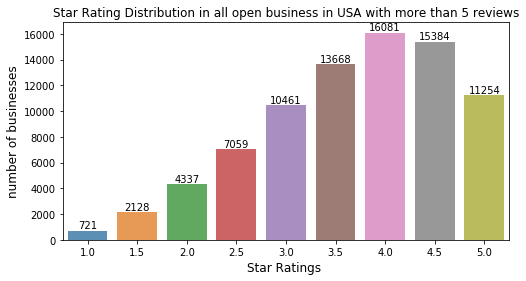

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

x=businessCleaner['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution in all open business in USA with more than 5 reviews")
plt.ylabel('number of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [45]:
# What are the popular business categories?
business_cats=' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

KeyError: 'categories'